# Final Project

By Amanda Arce and Tresanne Bonnick

For this project we will be analyzing data from two separate data sets, poverty and crime. Our hypotheses is that as poverty increases crime increases. We will analyze the data to confirm if this educated guess is true or false. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
#Read file into pandas
crime = pd.read_csv('https://raw.githubusercontent.com/Tresanne/IS362-JUPYTERNOTEBOOK/master/Crime%20in%20the%20past%2020%20yrs.csv', thousands=',')
crime

,Year,Population1,Violent crime,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (legacy definition)2,Rape (legacy definition)2 rate,Robbery,Robbery rate,...,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate,Unnamed: 20
0,1994,260327021,1857670,713.6,23326,9.0,102216,39.3,618949,237.8,...,427.6,12131873,4660.2,2712774,1042.1,7879812,3026.9,1539287,591.3,NaN
1,1995,262803276,1798792,684.5,21606,8.2,97470,37.1,580509,220.9,...,418.3,12063935,4590.5,2593784,987.0,7997710,3043.2,1472441,560.3,NaN
2,1996,265228572,1688540,636.6,19645,7.4,96252,36.3,535594,201.9,...,391.0,11805323,4451.0,2506400,945.0,7904685,2980.3,1394238,525.7,NaN
3,1997,267783607,1636096,611.0,18208,6.8,96153,35.9,498534,186.2,...,382.1,11558475,4316.3,2460526,918.8,7743760,2891.8,1354189,505.7,NaN
4,1998,270248003,1533887,567.6,16974,6.3,93144,34.5,447186,165.5,...,361.4,10951827,4052.5,2332735,863.2,7376311,2729.5,1242781,459.9,NaN
5,1999,272690813,1426044,523.0,15522,5.7,89411,32.8,409371,150.1,...,334.3,10208334,3743.6,2100739,770.4,6955520,2550.7,1152075,422.5,NaN
6,2000,281421906,1425486,506.5,15586,5.5,90178,32.0,408016,145.0,...,324.0,10182584,3618.3,2050992,728.8,6971590,2477.3,1160002,412.2,NaN
7,2013,285317559,1439480,504.5,16037,5.6,90863,31.8,423557,148.5,...,318.6,10437189,3658.1,2116531,741.8,7092267,2485.7,1228391,430.5,NaN
8,2002,287973924,1423677,494.4,16229,5.6,95235,33.1,420806,146.1,...,309.5,10455277,3630.6,2151252,747.0,7057379,2450.7,1246646,432.9,NaN
9,2003,290788976,1383676,475.8,16528,5.7,93883,32.3,414235,142.5,...,295.4,10442862,3591.2,2154834,741.0,7026802,2416.5,1261226,433.7,NaN


In [4]:
#drop all rows and olumns with Nan
crime=crime.dropna(axis=1,how='all')
crime.head()

,Year,Population1,Violent crime,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (legacy definition)2,Rape (legacy definition)2 rate,Robbery,Robbery rate,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate
0,1994,260327021,1857670,713.6,23326,9.0,102216,39.3,618949,237.8,1113179,427.6,12131873,4660.2,2712774,1042.1,7879812,3026.9,1539287,591.3
1,1995,262803276,1798792,684.5,21606,8.2,97470,37.1,580509,220.9,1099207,418.3,12063935,4590.5,2593784,987.0,7997710,3043.2,1472441,560.3
2,1996,265228572,1688540,636.6,19645,7.4,96252,36.3,535594,201.9,1037049,391.0,11805323,4451.0,2506400,945.0,7904685,2980.3,1394238,525.7
3,1997,267783607,1636096,611.0,18208,6.8,96153,35.9,498534,186.2,1023201,382.1,11558475,4316.3,2460526,918.8,7743760,2891.8,1354189,505.7
4,1998,270248003,1533887,567.6,16974,6.3,93144,34.5,447186,165.5,976583,361.4,10951827,4052.5,2332735,863.2,7376311,2729.5,1242781,459.9


In [5]:
#Find column names
crime.columns


Index(['Year', 'Population1', 'Violent\ncrime', 'Violent \ncrime \nrate ',
       'Murder and\nnonnegligent \nmanslaughter',
       'Murder and \nnonnegligent \nmanslaughter \nrate ',
       'Rape\n(legacy\ndefinition)2', 'Rape\n(legacy\ndefinition)2\nrate',
       'Robbery', 'Robbery \nrate ', 'Aggravated \nassault',
       'Aggravated \nassault rate ', 'Property \ncrime',
       'Property \ncrime \nrate ', 'Burglary', 'Burglary \nrate ',
       'Larceny-\ntheft', 'Larceny-\ntheft rate ', 'Motor \nvehicle \ntheft',
       'Motor \nvehicle \ntheft \nrate'],
      dtype='object')

In [6]:
#Sort Population values
crime.sort_values('Population1', ascending=False)

,Year,Population1,Violent crime,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (legacy definition)2,Rape (legacy definition)2 rate,Robbery,Robbery rate,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate
19,2013,316128839,1163146,367.9,14196,4.5,79770,25.2,345031,109.1,724149,229.1,8632512,2730.7,1928465,610.0,6004453,1899.4,699594,221.3
18,2012,313873685,1217057,387.8,14856,4.7,85141,27.1,355051,113.1,762009,242.8,9001992,2868.0,2109932,672.2,6168874,1965.4,723186,230.4
17,2011,311587816,1206005,387.1,14661,4.7,84175,27.0,354746,113.9,752423,241.5,9052743,2905.4,2185140,701.3,6151095,1974.1,716508,230.0
16,2010,309330219,1251248,404.5,14722,4.8,85593,27.7,369089,119.3,781844,252.8,9112625,2945.9,2168459,701.0,6204601,2005.8,739565,239.1
15,2009,307006550,1325896,431.9,15399,5.0,89241,29.1,408742,133.1,812514,264.7,9337060,3041.3,2203313,717.7,6338095,2064.5,795652,259.2
14,2008,304059724,1394461,458.6,16465,5.4,90750,29.8,443563,145.9,843683,277.5,9774152,3214.6,2228887,733.0,6586206,2166.1,959059,315.4
13,2007,301621157,1422970,471.8,17128,5.7,92160,30.6,447324,148.3,866358,287.2,9882212,3276.4,2190198,726.1,6591542,2185.4,1100472,364.9
12,2006,299398484,1435123,479.3,17309,5.8,94472,31.6,449246,150.0,874096,292.0,10019601,3346.6,2194993,733.1,6626363,2213.2,1198245,400.2
11,2005,296507061,1390745,469.0,16740,5.6,94347,31.8,417438,140.8,862220,290.8,10174754,3431.5,2155448,726.9,6783447,2287.8,1235859,416.8
10,2004,293656842,1360088,463.2,16148,5.5,95089,32.4,401470,136.7,847381,288.6,10319386,3514.1,2144446,730.3,6937089,2362.3,1237851,421.5


# Aggregations

In [7]:
crime.Population1.min()

260327021

In [8]:
crime.Population1.max()

316128839

In [9]:
crime.Population1.max() - crime.Population1.min()

55801818

In [10]:
change_percent = ((crime.Population1.max()-crime.Population1.min())/crime.Population1.min())*100
change_percent

21.435276978028341

The population increased over the past 19 years.
In 1994 it was 260,327,021 and in 2013 it was 316,128,839. That is a difference of 55,801,818! and a change of 21% 

In [11]:
#Sort Violent Crime values
crime.sort_values('Violent\ncrime', ascending=False)

,Year,Population1,Violent crime,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (legacy definition)2,Rape (legacy definition)2 rate,Robbery,Robbery rate,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate
0,1994,260327021,1857670,713.6,23326,9.0,102216,39.3,618949,237.8,1113179,427.6,12131873,4660.2,2712774,1042.1,7879812,3026.9,1539287,591.3
1,1995,262803276,1798792,684.5,21606,8.2,97470,37.1,580509,220.9,1099207,418.3,12063935,4590.5,2593784,987.0,7997710,3043.2,1472441,560.3
2,1996,265228572,1688540,636.6,19645,7.4,96252,36.3,535594,201.9,1037049,391.0,11805323,4451.0,2506400,945.0,7904685,2980.3,1394238,525.7
3,1997,267783607,1636096,611.0,18208,6.8,96153,35.9,498534,186.2,1023201,382.1,11558475,4316.3,2460526,918.8,7743760,2891.8,1354189,505.7
4,1998,270248003,1533887,567.6,16974,6.3,93144,34.5,447186,165.5,976583,361.4,10951827,4052.5,2332735,863.2,7376311,2729.5,1242781,459.9
7,2013,285317559,1439480,504.5,16037,5.6,90863,31.8,423557,148.5,909023,318.6,10437189,3658.1,2116531,741.8,7092267,2485.7,1228391,430.5
12,2006,299398484,1435123,479.3,17309,5.8,94472,31.6,449246,150.0,874096,292.0,10019601,3346.6,2194993,733.1,6626363,2213.2,1198245,400.2
5,1999,272690813,1426044,523.0,15522,5.7,89411,32.8,409371,150.1,911740,334.3,10208334,3743.6,2100739,770.4,6955520,2550.7,1152075,422.5
6,2000,281421906,1425486,506.5,15586,5.5,90178,32.0,408016,145.0,911706,324.0,10182584,3618.3,2050992,728.8,6971590,2477.3,1160002,412.2
8,2002,287973924,1423677,494.4,16229,5.6,95235,33.1,420806,146.1,891407,309.5,10455277,3630.6,2151252,747.0,7057379,2450.7,1246646,432.9


The highest violent crime rate from 1994-2013 was in 1994. The lowest was in 2013. This means that on average, over the past 19 years, crime rate decreased even though the population increased. 

In [12]:
#Statistical analysis of Violent Crime
#Percent Change
percent = crime['Violent\ncrime'].pct_change()
percent

0          NaN
1    -0.031695
2    -0.061292
3    -0.031059
4    -0.062471
5    -0.070307
6    -0.000391
7     0.009817
8    -0.010978
9    -0.028097
10   -0.017047
11    0.022540
12    0.031910
13   -0.008468
14   -0.020035
15   -0.049170
16   -0.056300
17   -0.036158
18    0.009164
19   -0.044296
Name: Violent\ncrime, dtype: float64

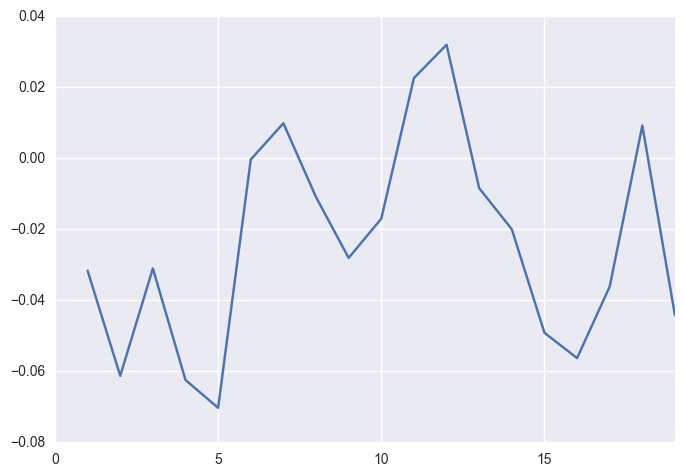

In [13]:
percent.plot()
plt.show()

In [14]:
%matplotlib inline

# Graphs showing Population verses Violent Crime rate. 

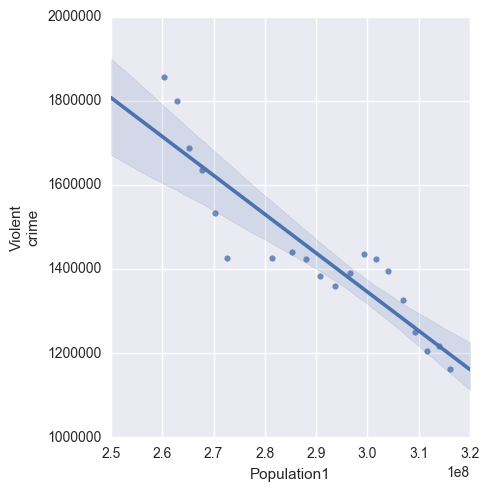

In [15]:
sns.lmplot("Population1", "Violent\ncrime", data=crime, fit_reg=True)


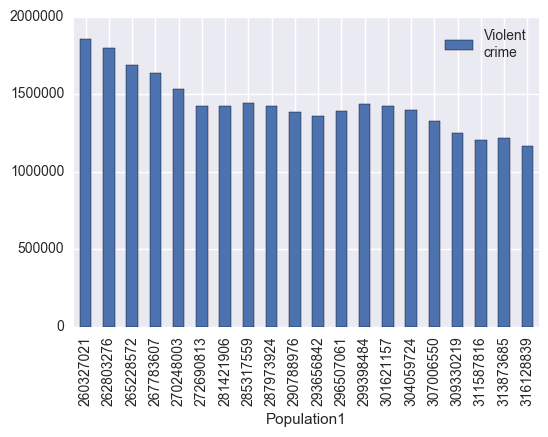

In [16]:
crime.plot.bar(x='Population1', y='Violent\ncrime')

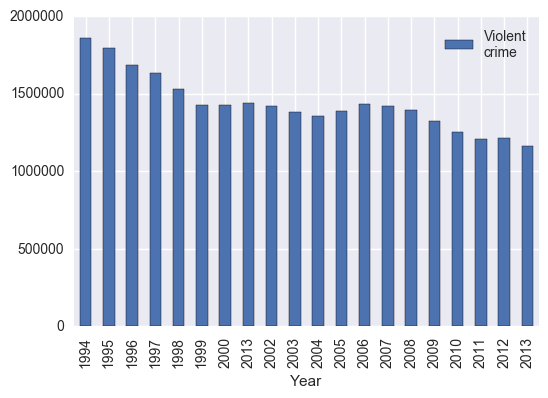

In [17]:
crime.plot.bar(x='Year', y='Violent\ncrime')

In [18]:
#Read second data set into pandas
poverty = pd.read_csv('https://raw.githubusercontent.com/mandiemannz/IS362/master/Impact_Poverty_updated_2_.csv', thousands=',')
poverty.head()

,Year,Offical Poverty_Total,Offical Poverty_Number,Offical Poverty_Percent,Money Income Minus Social Security_Number,Money Income Minus Social Security_Percent,Money Income Minus Unemployment Insurance Compensation_Number,Money Income Minus Unemployment Insurance Compensation_Percent,Money Income Plus SNAP _Food Stamps_Number,Money Income Minus Unemployment Insurance Compensation_Percent.1,Money Income Plus Federal Earned Income Tax Credit_Number,Money Income Plus Federal Earned Income Tax Credit_Percent
0,2013,312965,45318,14.5,68684,22.1,48239.0,15.5,42518.0,13.7,40999.0,13.2
1,2012,310648,46496,15.0,67663,21.9,48553.0,15.7,42322.0,13.7,40560.0,13.2
2,2011,308456,46247,15.0,66830,21.8,49560.0,16.2,42426.0,13.9,40968.0,13.4
3,2010,306130,46343,15.1,64021,21.1,46893.0,15.4,39919.0,13.1,38243.0,12.6
4,2009,303820,43569,14.3,59637,19.8,40734.0,13.5,37591.0,12.5,35895.0,11.9


We decided to drop all years below 1994 to match with the crime data set. 

In [19]:
#drop all rows below 1994. 
povertynew = poverty.drop(poverty.index[[20,21,22,23,24,25,26,27,28,29,30,31,32]], axis=0)
povertynew

,Year,Offical Poverty_Total,Offical Poverty_Number,Offical Poverty_Percent,Money Income Minus Social Security_Number,Money Income Minus Social Security_Percent,Money Income Minus Unemployment Insurance Compensation_Number,Money Income Minus Unemployment Insurance Compensation_Percent,Money Income Plus SNAP _Food Stamps_Number,Money Income Minus Unemployment Insurance Compensation_Percent.1,Money Income Plus Federal Earned Income Tax Credit_Number,Money Income Plus Federal Earned Income Tax Credit_Percent
0,2013,312965,45318,14.5,68684,22.1,48239.0,15.5,42518.0,13.7,40999.0,13.2
1,2012,310648,46496,15.0,67663,21.9,48553.0,15.7,42322.0,13.7,40560.0,13.2
2,2011,308456,46247,15.0,66830,21.8,49560.0,16.2,42426.0,13.9,40968.0,13.4
3,2010,306130,46343,15.1,64021,21.1,46893.0,15.4,39919.0,13.1,38243.0,12.6
4,2009,303820,43569,14.3,59637,19.8,40734.0,13.5,37591.0,12.5,35895.0,11.9
5,2008,301041,39829,13.2,56293,18.8,37763.0,12.6,35585.0,11.9,32940.0,11.0
6,2007,298699,37276,12.5,54574,18.4,37033.0,12.5,34701.0,11.7,32320.0,10.9
7,2006,296450,36460,12.3,55165,18.8,37605.0,12.8,35235.0,12.0,32943.0,11.2
8,2005,293135,36950,12.6,55811,19.2,37740.0,13.0,35307.0,12.1,33324.0,11.5
9,2004,290617,37040,12.7,54044,18.8,37124.0,12.9,34496.0,12.0,32062.0,11.1


In [20]:
povertynew.sort_values('Offical Poverty_Total', ascending = False)

,Year,Offical Poverty_Total,Offical Poverty_Number,Offical Poverty_Percent,Money Income Minus Social Security_Number,Money Income Minus Social Security_Percent,Money Income Minus Unemployment Insurance Compensation_Number,Money Income Minus Unemployment Insurance Compensation_Percent,Money Income Plus SNAP _Food Stamps_Number,Money Income Minus Unemployment Insurance Compensation_Percent.1,Money Income Plus Federal Earned Income Tax Credit_Number,Money Income Plus Federal Earned Income Tax Credit_Percent
0,2013,312965,45318,14.5,68684,22.1,48239.0,15.5,42518.0,13.7,40999.0,13.2
1,2012,310648,46496,15.0,67663,21.9,48553.0,15.7,42322.0,13.7,40560.0,13.2
2,2011,308456,46247,15.0,66830,21.8,49560.0,16.2,42426.0,13.9,40968.0,13.4
3,2010,306130,46343,15.1,64021,21.1,46893.0,15.4,39919.0,13.1,38243.0,12.6
4,2009,303820,43569,14.3,59637,19.8,40734.0,13.5,37591.0,12.5,35895.0,11.9
5,2008,301041,39829,13.2,56293,18.8,37763.0,12.6,35585.0,11.9,32940.0,11.0
6,2007,298699,37276,12.5,54574,18.4,37033.0,12.5,34701.0,11.7,32320.0,10.9
7,2006,296450,36460,12.3,55165,18.8,37605.0,12.8,35235.0,12.0,32943.0,11.2
8,2005,293135,36950,12.6,55811,19.2,37740.0,13.0,35307.0,12.1,33324.0,11.5
9,2004,290617,37040,12.7,54044,18.8,37124.0,12.9,34496.0,12.0,32062.0,11.1


In [21]:
povertynew['Offical Poverty_Total'].min()

261616

In [22]:
povertynew['Offical Poverty_Total'].max()

312965

In [23]:
povertynew['Offical Poverty_Total'].max() - povertynew['Offical Poverty_Total'].min()

51349

The poverty rate increased from 261,616 in 1994 to 312,965 in 2013. 

# Graphs showing Poverty rate vs Year

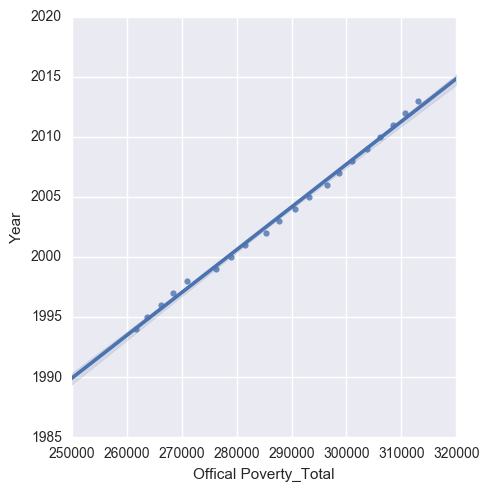

In [24]:
sns.lmplot('Offical Poverty_Total','Year', data=povertynew, fit_reg=True)

There was a steady increase in the number of people who are living in poverty over the past 19 years. 

# Comparing the Poverty data set and the Crime data set by combining columns from the two separate data sets. 

In [25]:
#Reversed the order of the Violent crime data to match with the poverty data. 
crimedata = crime['Violent\ncrime']
reverseddata = crimedata.iloc[::-1].reset_index(drop=True)

In [26]:
Year = povertynew['Year']

In [27]:
Poverty = povertynew['Offical Poverty_Total']

In [28]:
newdata = pd.concat((Year, reverseddata, Poverty), axis=1)
newdata

,Year,Violent crime,Offical Poverty_Total
0,2013,1163146,312965
1,2012,1217057,310648
2,2011,1206005,308456
3,2010,1251248,306130
4,2009,1325896,303820
5,2008,1394461,301041
6,2007,1422970,298699
7,2006,1435123,296450
8,2005,1390745,293135
9,2004,1360088,290617


# Graphs showing Poverty vs Violent Crime

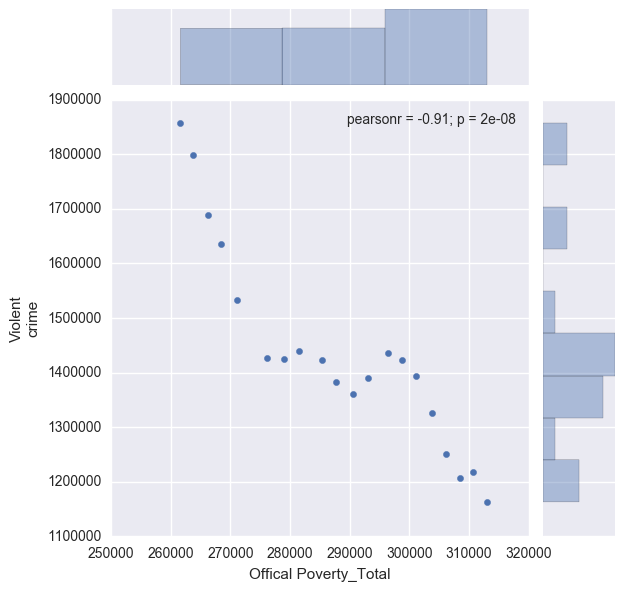

In [29]:
sns.jointplot(x="Offical Poverty_Total", y="Violent\ncrime", data=newdata);

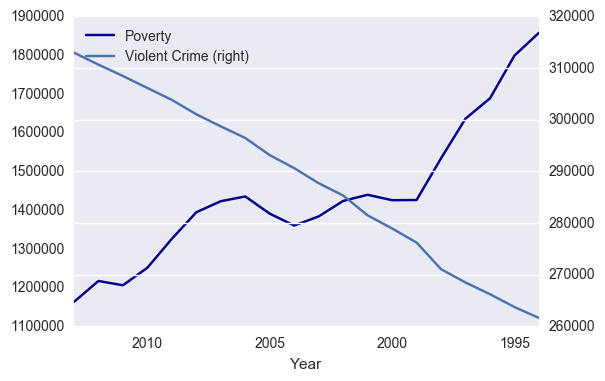

In [53]:
ax=newdata.plot(kind='line', x='Year', y='Violent\ncrime', color='DarkBlue', label='Poverty')
newdata.plot(kind='line', x='Year', y='Offical Poverty_Total', secondary_y=True, label='Violent Crime', ax=ax);



As this graph shows, as poverty increased, violent crime decreased over the past 19 years and our hypotheses was proven to be false. 